# Volatility estimation

## Contents
   - [Path generation](#sec1) 
   - [Kalman filter](#sec2)


In [2]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from functions.Processes import Heston_process

<a id='sec1'></a>
# Simulated path

Let us consider a stock price $\{S_t\}_{t\geq 0}$ following a Heston process. We introduced the Heston process in the notebook **1.4**, but it is better to recall here its SDE 

$$ \begin{cases}
dS_t = \mu S_t dt + \sqrt{v_t} S_t dW^1_t \\
dv_t = \kappa (\theta - v_t) dt + \sigma \sqrt{v_t} dW^2_t 
\end{cases}$$

The process $\{v_t\}_{t\geq 0}$ is the variance process and follows a CIR process (see notebook **1.2**).     

The parameters are:
- $\mu$ drift of the stock process
- $\kappa$ mean reversion coefficient of the variance process
- $\theta$ long term mean of the variance process 
- $\sigma$  volatility coefficient of the variance process
- $\rho$ correlation between $W^1$ and $W^2$.

In [89]:
N = 1500                                      # time steps 
T = 6                                         # time in years  
T_vec, dt = np.linspace(0,T,N, retstep=True )

S0 = 100                                      # initial price
v0 = 0.04                                     # initial variance 

mu = 0; rho = -0.5; kappa = 2.5; theta = 0.04; sigma = 0.2

std_asy = np.sqrt( theta * sigma**2 /(2*kappa) )   # asymptotic standard deviation for the CIR process
assert(2*kappa * theta > sigma**2)                 # Feller condition

Where for simplicity I chose $\mu=0$.   
I also chose $N=1500$ which should be intended as *days* in $T=6$ years. A quite realistic situation. 

Let us generate the path using the function `Heston_process.path`.

In [90]:
np.random.seed(seed=42) 
Hest = Heston_process(mu=mu, rho=rho, sigma=sigma, theta=theta, kappa=kappa)
S, V = Hest.path(S0, v0, N, T)      # S is the stock, V is the variance

##### Plot:

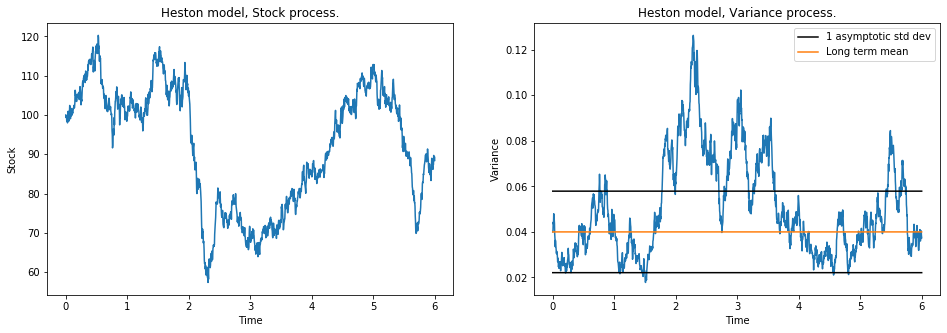

In [91]:
fig = plt.figure(figsize=(16,5))
ax1 = fig.add_subplot(121); ax2 = fig.add_subplot(122)

ax1.plot(T_vec, S )
ax1.set_title("Heston model, Stock process."); ax1.set_xlabel("Time"); ax1.set_ylabel("Stock")
ax2.plot(T_vec, V )
ax2.set_title("Heston model, Variance process."); ax2.set_xlabel("Time"); ax2.set_ylabel("Variance")
ax2.plot(T_vec, (theta + std_asy)*np.ones_like(T_vec), label="1 asymptotic std dev", color="black" )
ax2.plot(T_vec, (theta - std_asy)*np.ones_like(T_vec), color="black" )
ax2.plot(T_vec, theta*np.ones_like(T_vec), label="Long term mean" )
ax2.legend(loc="upper right"); 
plt.show()

Let us compute the log-returns and plot the histogram:

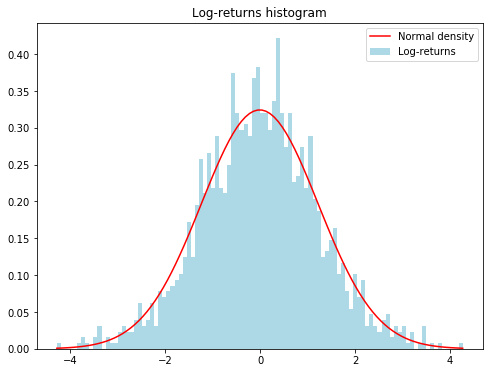

In [94]:
X = S[1:]-S[:-1]
x = np.linspace(X.min(), X.max(), 100)

plt.figure(figsize=(8,6))
plt.plot(x, ss.norm.pdf(x, X.mean(), X.std(ddof=0)), color='r', label="Normal density")
plt.hist(X, density=True, bins=100, facecolor="LightBlue", label="Log-returns")
plt.legend(); plt.title("Log-returns histogram"); plt.show()

<a id='sec2'></a>
# Kalman filter